## DSCI 100 Group Project Proposal

#### Group 24, Section 008
#### Group Members: David Lim, Livlene Tiwana, Haolan Wu, Bella Zhang

**Introduction:**
	
Weather predictions play a pivotal role in various aspects of people's daily lives, encompassing everyday activities such as commuting to work or school, as well as impacting critical sectors like agriculture and tourism. Consequently, the ability to forecast weather accurately, utilizing key atmospheric indicators such as temperature and humidity, promises significant convenience for our lives. In this context, our group's focus lies in weather category prediction, employing two primary variables: temperature and atmospheric pressure.
Our weather dataset comprises seven forecasted variables, including temperature, precipitation, humidity, wind speed and direction, atmospheric pressure, cloud cover, and UV index. However, for our project, we will concentrate on two of these variables. Additionally, our dataset features a target variable column representing weather categories, encompassing seven primary classifications: clear, which rain, snow, cloudy, haze, fog, and drizzle. It's worth noting that some combined weather categories will not be utilized in our project. Instead, our analysis will center around five distinct categories: clear, rain, snow, haze, and fog.


**Methods:**

In this prediction model, we use temperature and atmospheric pressure as the variables to classify the type of weather. There is a positive relationship between temperature and atmospheric pressure. The temperature of a place ascends as the atmospheric pressure of a place increases, vice versa. However, the different types of weather are caused by the level of the temperature and atmospheric pressure. 

In order to make predictions for new observations, we will use the K-nearest neighbors classification algorithm and cross-validation to choose K. The new observations are classified by the nearest point and the other nearby points. A scatter plot would be the suitable way for visualization of the result. The plot shows the distribution of weather data and the distance between new observations and the data. All data are scaled and denoted with colors for understanding.


**Expected outcomes and significance:**

We would expect to see distinct correlations between certain weather types and  atmospheric pressures + temperature that is occurring during those atmospheric conditions. For example, perhaps we might notice that a snowy day is often associated with lower temperatures (below freezing) and low atmospheric pressure. We would expect to see high pressure systems associated with more dry weather and low pressure systems to be associated with more precipitation. In terms of temperature we are expecting the weather trends to not be as black and white since temperature alone is not a good determinant of weather, however we do expect to see snow with colder temperatures and rain with temperatures in positive °C.
Having a model of atmospheric pressure and temperature levels can help us predict what type of weather would be expected to be seen on that given day with those particular conditions in the future.

From this model we can see whether there are other atmospheric predictors which can more accurately predict weather. We could also Do the two predictors we used do a good job at classifying unknown observations or would it be more beneficial to classify weather observations with even more atmospheric predicting variables.


In [26]:
library(tidyverse)
library(repr)
library(tidymodels)

In [25]:
# READ THE DATA
weather <- read_csv("weather_data.csv")

weather

Rows: 8784 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Date/Time, Weather
dbl (6): Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog


In [13]:
# WRANGLE THE DATA:

weather <- weather |>
    select(Temp_C, Press_kPa, Weather) |>
    filter(Weather == "Snow" | Weather == "Clear" | Weather == "Rain")|>
    rename(temperature = Temp_C, pressure = Press_kPa, weather = Weather)

weather

temperature,pressure,weather
<dbl>,<dbl>,<chr>
3.8,99.74,Rain
3.1,99.68,Rain
-14.0,100.95,Snow
-16.9,101.74,Clear
-13.7,101.25,Snow
-11.3,100.97,Snow
-10.2,100.89,Snow
-9.4,100.79,Snow
-8.9,100.76,Snow


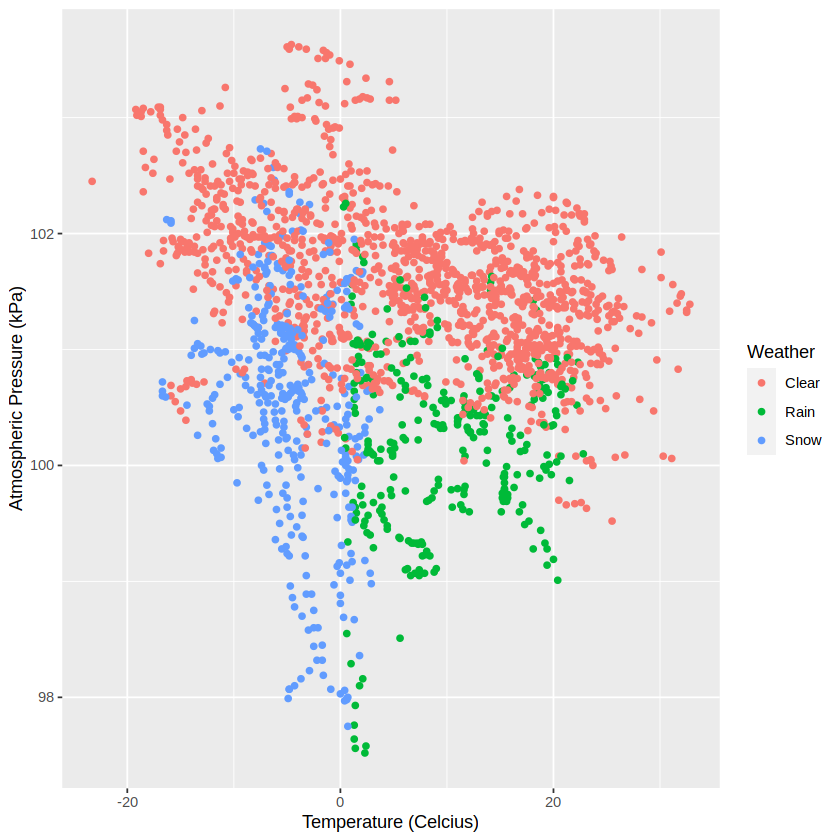

In [14]:
# INITIAL PLOT:

weather_data_plot <- weather |>
    ggplot(aes(x = temperature, y = pressure, color = weather)) +
    geom_point() +
    labs(x = "Temperature (Celcius)", y = "Atmospheric Pressure (kPa)", color = "Weather")


weather_data_plot

In [15]:
# SPlIT THE DATA INTO TRAINING AND TESTING:
# Randomly took 80% of the data in the training set. 

weather_split <- initial_split(weather, prop = 0.75, strata = weather)

weather_train <- training(weather_split)

weather_test <- testing(weather_split)

In [16]:
# SUMMARIZE THE DATA INTO A TABLE BY COUNT:

weather_counts <- weather_train |>
    group_by(weather) |>
    summarize(count = n())

weather_counts

weather,count
<chr>,<int>
Clear,994
Rain,229
Snow,292


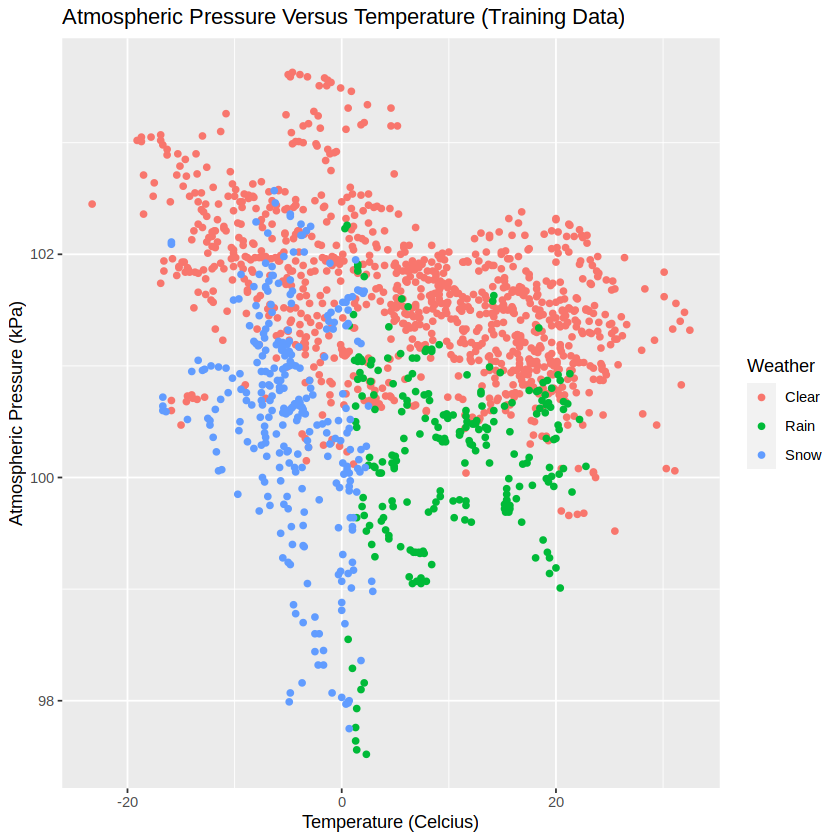

In [17]:
# VISUALIZATION OF TRAINING DATA, HIGHLIGHTING THE WEATHER CLASSES:

weather_data_plot_training <- weather_train |>
    ggplot(aes(x = temperature, y = pressure, color = weather)) +
    geom_point() +
    ggtitle("Atmospheric Pressure Versus Temperature (Training Data)") +
    labs(x = "Temperature (Celcius)", y = "Atmospheric Pressure (kPa)", color = "Weather")

weather_data_plot_training

In [21]:
#CHOOSING K-VALUE USING CROSS VALIDATION

#1. performing a 5-fold cross validation
set.seed(2000)
weather_vfold <- vfold_cv(weather_train, v = 5, strata = weather)
weather_vfold


splits                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [23]:
#2. performing workflow analysis, so we can run cross validation for each split
set.seed(2000)

knn_spec<-nearest_neighbor(weight_func="rectangular",neighbors=3)|>
set_engine("kknn")|>
set_mode("classification")

weather_recipe <- recipe(weather ~ pressure + temperature, data = weather_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors())

weather_resamples_fit<-workflow()|>
add_recipe(weather_recipe)|>
add_model(knn_spec)|>
fit_resamples(resamples=weather_vfold)

weather_resample_fit

ERROR: [1m[33mError[39m in `check_installs()`:[22m
[33m![39m Some package installs are required: 
[36m•[39m 'kknn', 'kknn'
